# NV Center Fundamentals: Geometry, Electrons, and Symmetry

## Overview
This notebook covers the fundamental building blocks of understanding NV centers:
- **Step 0**: Defect geometry and electron counting
- **Step 1**: Molecular orbital construction from symmetry

These are the essential foundations that every aspect of the NV center energy diagram builds upon.

## Step 0: Know Your Defect and Electron Count

### The Raw Defect Structure

Before drawing any energy levels, we need to understand what we're working with:

| What you learn | Why it matters |
|---|---|
| Exact atomic layout and crystallographic axis | Sets the symmetry label written next to every electronic term |
| Which atoms bring which valence electrons | Lets you count the total electron pool |
| Net charge of the center | Decides how many electrons stay on the defect vs. lattice |

### Atomic Geometry Inside Diamond

1. **Start from pristine diamond**: sp³-bonded face-centered-cubic (FCC) lattice
2. **Create the defect pair**:
   - Remove one carbon atom → vacancy with three neighboring carbons with dangling sp³ orbitals
   - Substitute adjacent carbon with nitrogen atom (N)
   - N keeps three tetrahedral bonds, fourth points toward vacancy

3. **Identify the symmetry**: The N–V pair plus three equivalent carbons form a trigonal pyramid
   - **Rotation**: 120° about the N→V line
   - **Mirrors**: three σ planes through that axis
   - **Point group**: C₃ᵥ

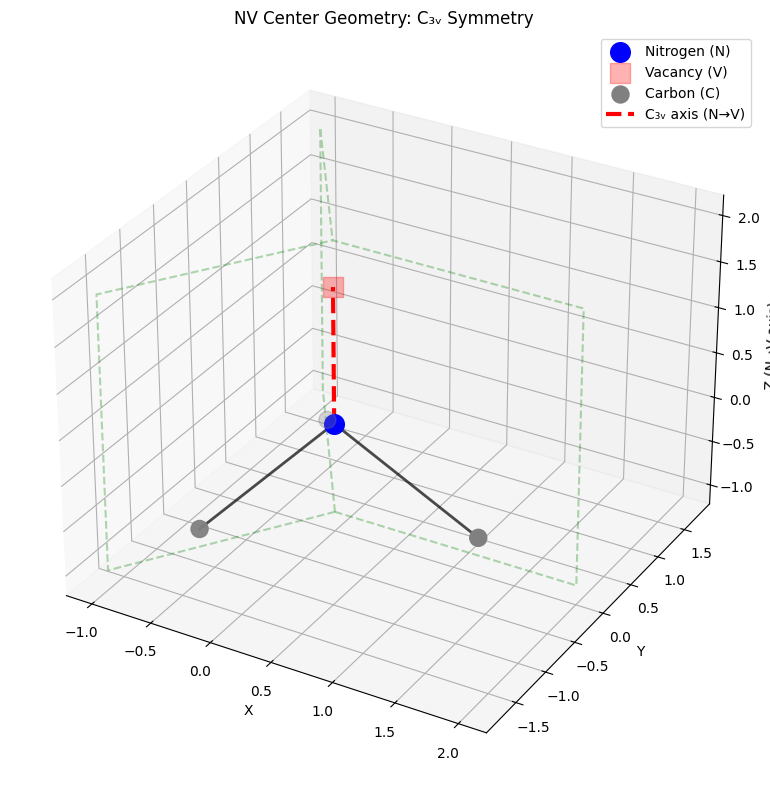

NV Center Geometry:
- Point group: C₃ᵥ
- Symmetry operations: E, 2C₃, 3σᵥ
- z-axis: N → V direction
- x-y plane: contains the three carbon atoms


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D visualization of the NV center geometry
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define coordinates for the NV center
# Nitrogen at origin, vacancy along z-axis
N_pos = np.array([0, 0, 0])
V_pos = np.array([0, 0, 1.5])  # Vacancy position

# Three carbon atoms in a trigonal arrangement
angle = 2 * np.pi / 3
radius = 1.2
C_positions = []
for i in range(3):
    x = radius * np.cos(i * angle)
    y = radius * np.sin(i * angle)
    z = -0.8  # Below the nitrogen
    C_positions.append([x, y, z])

C_positions = np.array(C_positions)

# Plot atoms
ax.scatter(*N_pos, s=200, c='blue', marker='o', label='Nitrogen (N)')
ax.scatter(*V_pos, s=200, c='red', marker='s', alpha=0.3, label='Vacancy (V)')
ax.scatter(C_positions[:, 0], C_positions[:, 1], C_positions[:, 2], 
           s=150, c='gray', marker='o', label='Carbon (C)')

# Draw bonds
for C_pos in C_positions:
    ax.plot([N_pos[0], C_pos[0]], [N_pos[1], C_pos[1]], [N_pos[2], C_pos[2]], 
            'k-', linewidth=2, alpha=0.7)

# Draw the C3v axis
ax.plot([N_pos[0], V_pos[0]], [N_pos[1], V_pos[1]], [N_pos[2], V_pos[2]], 
        'r--', linewidth=3, label='C₃ᵥ axis (N→V)')

# Add symmetry planes (simplified representation)
for i in range(3):
    theta = i * angle
    # Create a plane through the axis and one C-C bond
    plane_x = [0, 2*np.cos(theta), 2*np.cos(theta), 0]
    plane_y = [0, 2*np.sin(theta), 2*np.sin(theta), 0]
    plane_z = [-1, -1, 2, 2]
    ax.plot(plane_x, plane_y, plane_z, 'g--', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (N→V axis)')
ax.legend()
ax.set_title('NV Center Geometry: C₃ᵥ Symmetry')
plt.tight_layout()
plt.show()

print("NV Center Geometry:")
print("- Point group: C₃ᵥ")
print("- Symmetry operations: E, 2C₃, 3σᵥ")
print("- z-axis: N → V direction")
print("- x-y plane: contains the three carbon atoms")

### Counting Electrons: The Famous "Six"

This is crucial - if you can't trace these six electrons, nothing else will make sense:

1. **Nitrogen brings 5 valence electrons**
   - Three form σ-bonds to surrounding carbons
   - **2 remain** in lone-pair-like orbital toward vacancy

2. **Three vacancy carbons each contribute 1 dangling-bond electron → 3 more**

3. **Extra charge in NV⁻**
   - Additional electron captured from lattice
   - Total: 5 + 3 + 1 = 9 electrons around the site
   - But 3 are tied up in σ bonds with nitrogen
   - **Only 6 electrons in gap orbitals that matter**

This "six-electron model" is the foundation of all modern NV⁻ descriptions.

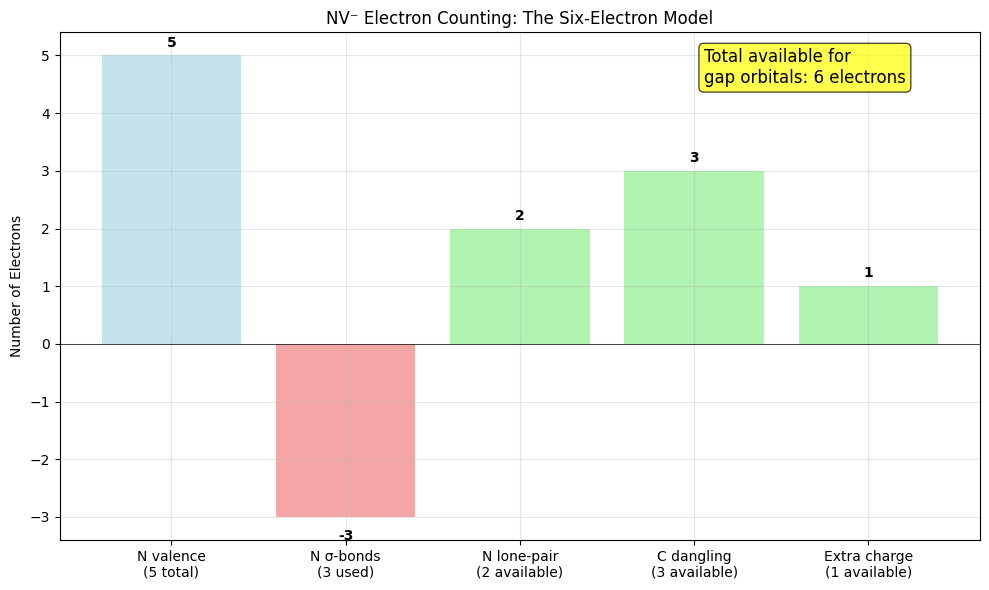


Electron counting checkpoint:
- Nitrogen valence electrons: 5
- Used in σ-bonds: 3
- Nitrogen lone-pair available: 2
- Carbon dangling bonds: 3
- Extra charge (NV⁻): 1
- Total in gap orbitals: 6 electrons


In [2]:
# Electron counting visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart showing electron contributions
sources = ['N valence\n(5 total)', 'N σ-bonds\n(3 used)', 'N lone-pair\n(2 available)', 
           'C dangling\n(3 available)', 'Extra charge\n(1 available)']
electrons = [5, -3, 2, 3, 1]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgreen', 'lightgreen']

bars = ax.bar(range(len(sources)), electrons, color=colors, alpha=0.7)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height > 0 else height - 0.2,
            f'{electrons[i]}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

ax.set_ylabel('Number of Electrons')
ax.set_title('NV⁻ Electron Counting: The Six-Electron Model')
ax.set_xticks(range(len(sources)))
ax.set_xticklabels(sources)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.grid(True, alpha=0.3)

# Add a text box with the final count
available_electrons = 2 + 3 + 1  # lone-pair + dangling + extra
ax.text(0.7, 0.9, f'Total available for\ngap orbitals: {available_electrons} electrons', 
        transform=ax.transAxes, fontsize=12, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("\nElectron counting checkpoint:")
print(f"- Nitrogen valence electrons: 5")
print(f"- Used in σ-bonds: 3")
print(f"- Nitrogen lone-pair available: 2")
print(f"- Carbon dangling bonds: 3")
print(f"- Extra charge (NV⁻): 1")
print(f"- Total in gap orbitals: {2 + 3 + 1} electrons")

## Step 1: Molecular Orbitals from Symmetry

### Goal
Starting from atomic dangling bonds, systematically obtain the three independent single-electron orbitals that will hold our six electrons.

### The C₃ᵥ Character Table

| C₃ᵥ | E | 2C₃ | 3σᵥ | Typical basis |
|-----|---|-----|-----|---------------|
| A₁  | 1 | 1   | 1   | z, x²+y²      |
| A₂  | 1 | 1   | -1  | Rz            |
| E   | 2 | -1  | 0   | (x,y), (Rx,Ry)|

### Starting Basis: Four Dangling-Bond Orbitals

| Orbital | Atom | Direction |
|---------|------|----------|
| n | N lone-pair sp³ | along +z (toward vacancy) |
| c₁, c₂, c₃ | sp³ of each C | tilted ~109° toward vacancy |

In [3]:
# Group theory analysis for orbital symmetry
import pandas as pd

# C3v character table
char_table = pd.DataFrame({
    'Irrep': ['A₁', 'A₂', 'E'],
    'E': [1, 1, 2],
    '2C₃': [1, 1, -1],
    '3σᵥ': [1, -1, 0]
})

print("C₃ᵥ Character Table:")
print(char_table.to_string(index=False))

# Calculate the reducible representation for 4 dangling bonds
print("\nReducible representation analysis:")
print("Four dangling-bond orbitals under C₃ᵥ operations:")

# Count unchanged orbitals under each operation
operations = ['E', 'C₃', 'σᵥ']
unchanged = [4, 1, 2]  # E: all 4, C₃: only N, σᵥ: N + 1 C in plane
multiplicities = [1, 2, 3]  # number of operations in each class

reducible_rep = pd.DataFrame({
    'Operation': operations,
    'Unchanged orbitals': unchanged,
    'Multiplicity': multiplicities,
    'Character χ(Γ)': unchanged
})

print(reducible_rep.to_string(index=False))

# Decompose into irreducible representations
h = 6  # order of group
n_A1 = (1*4*1 + 1*1*2 + 1*2*3) / h
n_A2 = (1*4*1 + 1*1*2 + (-1)*2*3) / h
n_E = (2*4*1 + (-1)*1*2 + 0*2*3) / h

print(f"\nDecomposition: Γ = {n_A1:.0f}A₁ ⊕ {n_A2:.0f}A₂ ⊕ {n_E:.0f}E")
print(f"Result: 2A₁ ⊕ E (A₂ does not appear)")
print("\nThis gives us exactly three molecular orbitals:")
print("- a₁(1): deep, N-dominated")
print("- a₁(2): gap state, more C-like")
print("- e (doubly degenerate): pure C character")

C₃ᵥ Character Table:
Irrep  E  2C₃  3σᵥ
   A₁  1    1    1
   A₂  1    1   -1
    E  2   -1    0

Reducible representation analysis:
Four dangling-bond orbitals under C₃ᵥ operations:
Operation  Unchanged orbitals  Multiplicity  Character χ(Γ)
        E                   4             1               4
       C₃                   1             2               1
       σᵥ                   2             3               2

Decomposition: Γ = 2A₁ ⊕ 0A₂ ⊕ 1E
Result: 2A₁ ⊕ E (A₂ does not appear)

This gives us exactly three molecular orbitals:
- a₁(1): deep, N-dominated
- a₁(2): gap state, more C-like
- e (doubly degenerate): pure C character


### Symmetry-Adapted Linear Combinations (SALCs)

The actual molecular orbitals are formed by taking linear combinations of the atomic orbitals:

| SALC | Mathematical form | Physical picture |
|------|------------------|------------------|
| **a₁(1)** | n + (1/√3)(c₁+c₂+c₃) | In-phase sum; biggest weight on N → **deep core-like** |
| **a₁(2)** | -(1/√3)n + (c₁+c₂+c₃) | Antibonding wrt N; node between N and C → **gap state** |
| **eₓ** | c₁ - (1/2)(c₂+c₃) | Pure carbon character |
| **eᵧ** | (√3/2)(c₂-c₃) | Pure carbon character |

### Energy Ordering

Because nitrogen is more electronegative than carbon:
- **a₁(1)** (largest N coefficient) drops deepest (~1-2 eV below valence band)
- **a₁(2)** sits higher in the band gap  
- **e** orbitals (no N contribution) just above a₁(2), still in gap
- DFT calculations: e-to-a₁(2) splitting ~0.2-0.3 eV

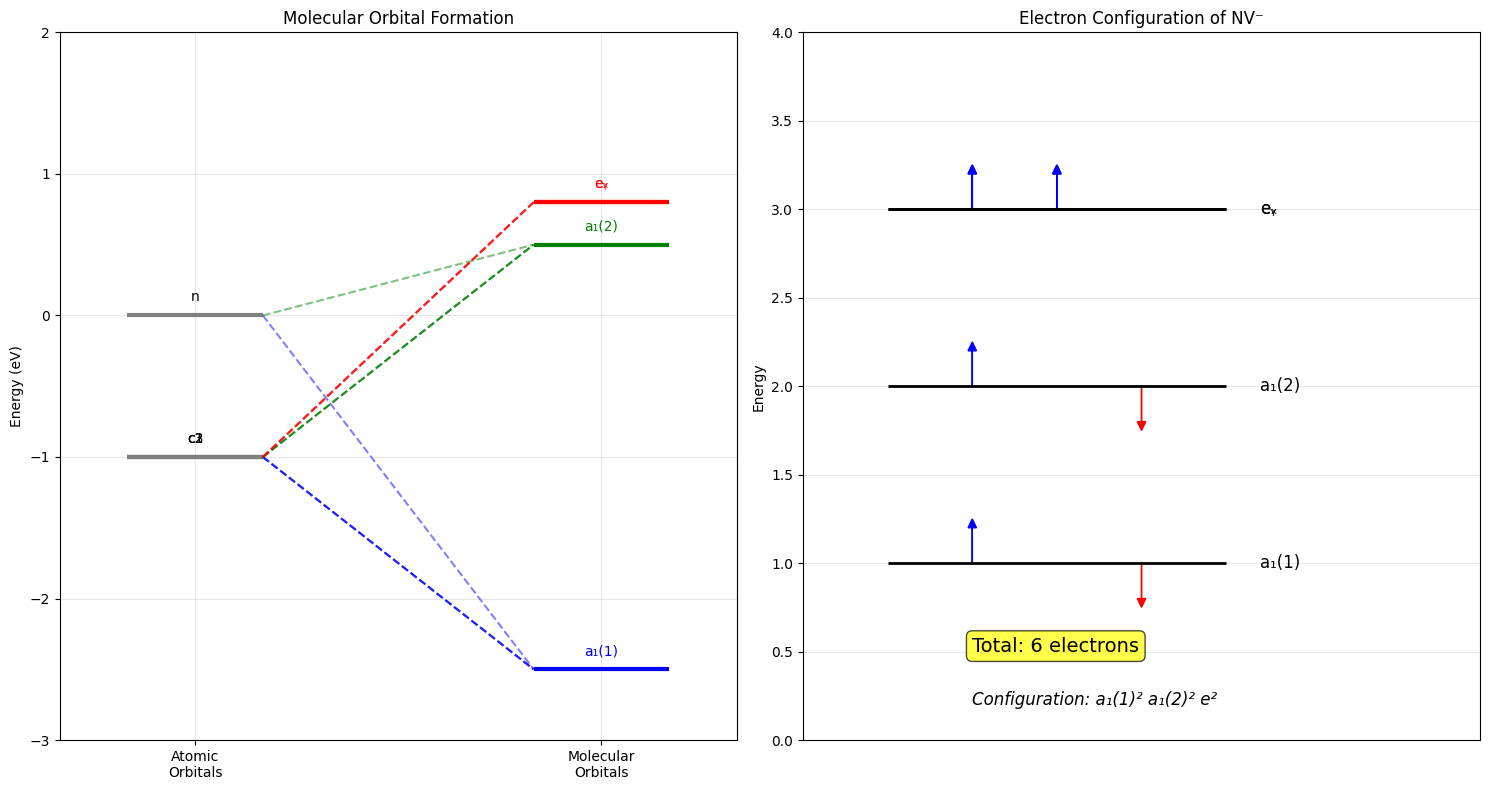


Key Results from Step 1:
- Four dangling bonds → 2A₁ ⊕ E molecular orbitals
- a₁(1): deep, N-dominated (−2.5 eV)
- a₁(2): gap state (+0.5 eV)
- e: doubly degenerate, C-dominated (+0.8 eV)
- Ground configuration: a₁(1)² a₁(2)² e²


In [4]:
# Visualize the molecular orbital energy levels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Left plot: Orbital formation scheme
# Atomic orbitals on left, molecular orbitals on right
atomic_levels = [-1, -1, -1, 0]  # c1, c2, c3, n (relative energies)
mo_levels = [-2.5, 0.5, 0.8, 0.8]  # a1(1), a1(2), ex, ey
mo_labels = ['a₁(1)', 'a₁(2)', 'eₓ', 'eᵧ']
mo_colors = ['blue', 'green', 'red', 'red']

# Draw atomic orbitals
for i, level in enumerate(atomic_levels):
    ax1.hlines(level, 0, 1, colors='gray', linewidth=3)
    if i < 3:
        ax1.text(0.5, level + 0.1, f'c{i+1}', ha='center', fontsize=10)
    else:
        ax1.text(0.5, level + 0.1, 'n', ha='center', fontsize=10)

# Draw molecular orbitals
for i, (level, label, color) in enumerate(zip(mo_levels, mo_labels, mo_colors)):
    ax1.hlines(level, 3, 4, colors=color, linewidth=3)
    ax1.text(3.5, level + 0.1, label, ha='center', fontsize=10, color=color)

# Draw mixing lines
# a1(1): all orbitals contribute
for atomic_level in atomic_levels:
    ax1.plot([1, 3], [atomic_level, mo_levels[0]], 'b--', alpha=0.5)

# a1(2): all orbitals contribute (different phase)
for atomic_level in atomic_levels:
    ax1.plot([1, 3], [atomic_level, mo_levels[1]], 'g--', alpha=0.5)

# e orbitals: only carbon contributions
for i in range(3):
    ax1.plot([1, 3], [atomic_levels[i], mo_levels[2]], 'r--', alpha=0.3)
    ax1.plot([1, 3], [atomic_levels[i], mo_levels[3]], 'r--', alpha=0.3)

ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-3, 2)
ax1.set_ylabel('Energy (eV)')
ax1.set_title('Molecular Orbital Formation')
ax1.set_xticks([0.5, 3.5])
ax1.set_xticklabels(['Atomic\nOrbitals', 'Molecular\nOrbitals'])
ax1.grid(True, alpha=0.3)

# Right plot: Electron filling
# Show how 6 electrons fill the MOs
energy_levels = [0.8, 0.8, 0.5, -2.5]  # ex, ey, a1(2), a1(1)
level_labels = ['eᵧ', 'eₓ', 'a₁(2)', 'a₁(1)']
degeneracies = [1, 1, 1, 1]
occupations = [1, 1, 2, 2]  # electrons in each orbital

y_positions = [3, 3, 2, 1]  # vertical positions for drawing

for i, (energy, label, occ, y_pos) in enumerate(zip(energy_levels, level_labels, occupations, y_positions)):
    # Draw orbital line
    ax2.hlines(y_pos, 0, 2, colors='black', linewidth=2)
    ax2.text(2.2, y_pos, label, va='center', fontsize=12)
    
    # Draw electrons as arrows
    if occ >= 1:
        ax2.arrow(0.5, y_pos, 0, 0.2, head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    if occ == 2:
        ax2.arrow(1.5, y_pos, 0, -0.2, head_width=0.05, head_length=0.05, fc='red', ec='red')
    elif occ == 1 and i < 2:  # e orbitals with single electrons
        ax2.arrow(1.0, y_pos, 0, 0.2, head_width=0.05, head_length=0.05, fc='blue', ec='blue')

# Add electron count
ax2.text(0.5, 0.5, 'Total: 6 electrons', fontsize=14, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax2.text(0.5, 0.2, 'Configuration: a₁(1)² a₁(2)² e²', fontsize=12, style='italic')

ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(0, 4)
ax2.set_ylabel('Energy')
ax2.set_title('Electron Configuration of NV⁻')
ax2.set_xticks([])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Results from Step 1:")
print("- Four dangling bonds → 2A₁ ⊕ E molecular orbitals")
print("- a₁(1): deep, N-dominated (−2.5 eV)")
print("- a₁(2): gap state (+0.5 eV)")
print("- e: doubly degenerate, C-dominated (+0.8 eV)")
print("- Ground configuration: a₁(1)² a₁(2)² e²")

## Summary and Checkpoint

### What we have established:

1. **Geometry**: NV⁻ has C₃ᵥ symmetry with the z-axis along N→V
2. **Electrons**: Exactly 6 electrons occupy the defect gap orbitals
3. **Molecular orbitals**: Three sets from group theory:
   - a₁(1): deep, doubly occupied
   - a₁(2): gap state, doubly occupied  
   - e: doubly degenerate, singly occupied (2 electrons total)
4. **Ground configuration**: a₁(1)² a₁(2)² e²

### Critical understanding check:

✅ Can you trace the six electrons back to their atomic origins?

✅ Do you understand why C₃ᵥ symmetry gives 2A₁ ⊕ E orbitals?

✅ Can you explain why a₁(1) is deepest and e is highest?

**Next**: In the next notebook, we'll see how the open e² shell leads to the famous ³A₂ ground state triplet through application of Hund's rules and group theory.